In [ ]:
## function for Converting pdf file to image

from pdf2image import convert_from_path   
def pdf2img(filepath):  
# Store Pdf with convert_from_path function 
  images = convert_from_path(filepath) 
  return images

Devnagiri OCR

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv("/content/data.csv")

In [ ]:
dataset.head()

In [ ]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
num_pixels = X.shape[1]
num_classes = 46
img_width = 32
img_height = 32
img_depth = 1 

In [ ]:
X_images = X.values.reshape(X.shape[0], img_width, img_height)

In [ ]:
for i in range(1, 9):    
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X_images[i-1], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
dataset.iloc[:,1024]

In [ ]:
dataset.iloc[:,1024].value_counts()

In [ ]:
rows_to_remove = np.where(dataset.iloc[:,1024].values==1024)
rows_to_remove

In [ ]:
#removing columns having string description of input value
dataset = dataset.drop(dataset.index[rows_to_remove[0]])

In [ ]:
X = dataset.iloc[:,:-1]
X_images = X.values.reshape(X.shape[0], img_width, img_height)
Y = dataset.iloc[:,-1]

In [ ]:
# output in binary format
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
Y = binencoder.fit_transform(Y)

In [ ]:
# data normalization
X = X / 255

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model

In [ ]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = baseline_model()

epochs = 10
batch_size = 400
history = model.fit(X_train.values, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size, verbose=2)

In [ ]:
cores = model.evaluate(X_test.values, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import keras
from keras import layers

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_images, Y, test_size=0.20)

X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, img_depth).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, img_depth).astype('float32')

In [ ]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (4, 4), input_shape=(img_height, img_width, img_depth), 
                     activation='relu', name="conv_1"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_1"))
    model.add(Conv2D(64, (3, 3), activation='relu', name="conv_2"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_2"))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', name="dense_1"))
    model.add(Dense(50, activation='relu', name="dense_2"))
    model.add(Dense(num_classes, activation='softmax', name="modeloutput"))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [14]:
%matplotlib inline
from google.colab.patches import cv2_imshow

In [13]:
## image preprocessor
import cv2
import numpy as np

img = cv2.imread('/content/marathi.png')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((2,2),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 


In [6]:
img.shape

(188, 1198, 3)

In [7]:
pre_img = get_grayscale(img)
pre_img = thresholding(pre_img)
pre_img.shape

(188, 1198)

In [30]:
def preprocess(bgr_img):#gray image   
    img = bgr_img[:]
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret,th_img = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) #converts black to white and inverse

    rows, cols = th_img.shape
    bg_test = np.array([th_img[i][i] for i in range(5)])
    if bg_test.all() == 0:
        text_color = 255
    else:
        text_color = 0
    #print('Process: Localization....\n')
    tb = borders(th_img, text_color)
    lr = borders(th_img.T, text_color)
    dummy = int(np.average((tb[2], lr[2]))) + 2
    template = th_img[tb[0]+dummy:tb[1]-dummy, lr[0]+dummy:lr[1]-dummy]
    #print("Process: Segmentation....\n")
    segments = segmentation(template, text_color)
    
    #print('Process: Detection.....\n')
    return segments, template, th_img, text_color

In [17]:
def borders(here_img, thresh):
    size = here_img.shape
    check = int(115 * size[0] / 600)
    image = here_img[:]
    top, bottom = 0, size[0] - 1
    #plt.imshow(image)
    #plt.show()
    shape = size

    #find the background color for empty column
    bg = np.repeat(thresh, shape[1])
    count = 0
    for row in range(1, shape[0]):
        if  (np.equal(bg, image[row]).any()) == True:
            #print(count)
            count += 1
        else:
            count = 0
        if count >= check:
            top = row - check
            break
    
    
    shape = image.shape
    bg = np.repeat(thresh, shape[1])
    count = 0
    rows = np.arange(1, shape[0])
    #print(rows)
    for row in rows[::-1]:
        if  (np.equal(bg, image[row]).any()) == True:
            count += 1
        else:
            count = 0
        if count >= check:
            bottom = row + count
            break
    #print(count)
    
    
    #plt.imshow(here_img[top:bottom, :])
    #plt.imshow(here_img[top:bottom, :])
    #plt.show()
    
    d1 = (top - 2) >= 0 
    d2 = (bottom + 2) < size[0]
    d = d1 and d2
    if(d):
        b = 2
    else:
        b = 0
    
    return (top, bottom, b)

In [18]:
## Segmentation
def segmentation(bordered, thresh):
    try:
        shape = bordered.shape
        check = int(50 * shape[0] / 320)
        image = bordered[:]
        image = image[check:].T
        shape = image.shape
        #plt.imshow(image)
        #plt.show()

        #find the background color for empty column
        bg = np.repeat(255 - thresh, shape[1])
        bg_keys = []
        for row in range(1, shape[0]):
            if  (np.equal(bg, image[row]).all()):
                bg_keys.append(row)            

        lenkeys = len(bg_keys)-1
        new_keys = [bg_keys[1], bg_keys[-1]]
        #print(lenkeys)
        for i in range(1, lenkeys):
            if (bg_keys[i+1] - bg_keys[i]) > check:
                new_keys.append(bg_keys[i])
                #print(i)

        new_keys = sorted(new_keys)
        #print(new_keys)
        segmented_templates = []
        first = 0
        for key in new_keys[1:]:
            segment = bordered.T[first:key]
            segmented_templates.append(segment.T)
            #show middle segments
            #plt.imshow(segment.T)
            #plt.show()
            first = key
        last_segment = bordered.T[new_keys[-1]:]
        segmented_templates.append(last_segment.T)
        
        #check if each segment shape is enough to do recognition
        

        return(segmented_templates)
    except:
        return [bordered]

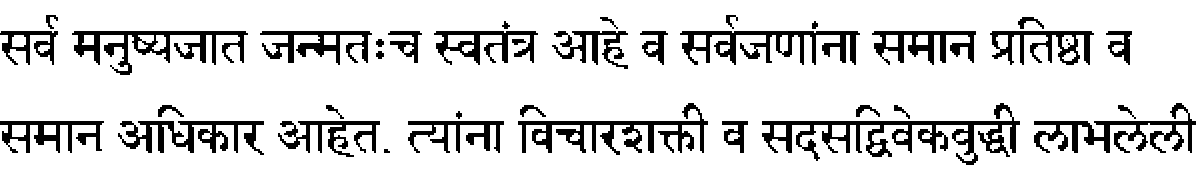

In [19]:
cv2_imshow(pre_img)

In [20]:
def localize(main_image, gray_img, localized, bc, show):
    #open the template as gray scale image
        template = localized
        #print(template.shape)
        width, height = template.shape[::-1] #get the width and height
        #match the template using cv2.matchTemplate
        match = cv2.matchTemplate(gray_img, template, cv2.TM_CCOEFF_NORMED)
        threshold = 0.8
        position = np.where(match >= threshold) #get the location of template in the image
        for point in zip(*position[::-1]): #draw the rectangle around the matched template
            cv2.rectangle(main_image, point, (point[0] + width, point[1] + height), (255 - bc, 0, bc ), 2)

        return main_image

In [34]:
def detect_text(main_image, gray_img, localized, bc):        
        cimg = cv2.resize(localized, (30, 30))
        nimg = cv2.copyMakeBorder(cimg, top=1, bottom=1, left=1, right=1, borderType=cv2.BORDER_CONSTANT, value=[255-bc, 0, 0])

        return main_image, nimg

In [22]:
import numpy as np
from keras.models import model_from_json
from keras.models import load_model

def prediction(img):
    # load json and create model
    json_file = open('cnn2\cnn2.json', 'r')
    
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    
    # load weights into new model
    loaded_model.load_weights("cnn2\cnn2.h5")
    #print("Loaded model from disk")
    
    loaded_model.save('cnn.hdf5')
    loaded_model=load_model('cnn.hdf5')
    
    characters = '०,१,२,३,४,५,६,७,८,९,क,ख,ग,घ,ङ,च,छ,ज,झ,ञ,ट,ठ,ड,ढ,ण,त,थ,द,ध,न,प,फ,ब,भ,म,य,र,ल,व,श,ष,स,ह,क्ष,त्र,ज्ञ'
    characters = characters.split(',')
    
    x = np.asarray(img, dtype = np.float32).reshape(1, 32, 32, 1) / 255 
    
    output = loaded_model.predict(x)
    output = output.reshape(46)
    predicted = np.argmax(output)
    devanagari_label = characters[predicted]
    success = output[predicted] * 100
    
    return devanagari_label, success

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def recognition(gray_image, show):
    segments, template, th_img, text_color = preprocess(gray_image)
    labels = []
    accuracy = []
    show_img = gray_image[:]
    #print(len(segments))
    
    for segment in segments: 
        #plt.imshow(segment)
        #plt.show()
        recimg, bimg = detect_text(show_img, th_img, segment, text_color)
        #print('Process: Recognition....\n')
        label, sure = prediction(bimg)
        if(sure > 80):
            #print(segment)
            labels.append(str(label))
            accuracy.append(sure)
            show_img = localize(show_img, th_img, segment, text_color, show)
        char = labels
    accuracy = np.average(accuracy)
    char = ''.join(char)
    if accuracy < 80:
        recimg, bimg = detect_text(show_img, th_img, template, text_color)
        show_img = localize(show_img, th_img, template, text_color, show)
        char, accuracy = prediction(bimg)
        
    if (show == 'show'):
        plt.imshow(show_img)
        plt.title('Detecting')
        plt.xticks([])
        plt.yticks([])
        plt.show()
    else:
        cv2.imshow('Detecting..', cv2.cvtColor(show_img, cv2.COLOR_GRAY2BGR))
    
    print('The prediction accuracy for ', char,' is ',"%.2f" % round(accuracy,2), '%')

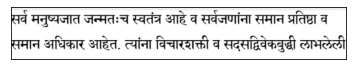

FileNotFoundError: ignored

In [35]:

import cv2
import matplotlib.pyplot as plt
import time

    #test = input('Please enter the image directory with name.\n')
test = cv2.imread('/content/marathi.png', 0)
plt.imshow(cv2.cvtColor(test, cv2.COLOR_GRAY2RGB))
plt.xticks([])
plt.yticks([])
plt.show()
time1 = time.time()
in_img = recognition(test, 'show')
print("In %f" %(time.time()-time1), 'sec')


    